In [1]:
import os
import pandas as pd
import numpy as np
PROJ_ROOT = os.path.join(os.pardir)

In [2]:
cmc_data = os.path.join(PROJ_ROOT, 
                         'data',
                        'raw-data',
                         'water_FINAL.csv')

lc_data = os.path.join(PROJ_ROOT, 
                         'data',
                        'processed',
                         'lc_df.csv')

In [170]:
cmc_df=pd.read_csv(cmc_data,parse_dates={'new_date':['Date','Time']},
                                         usecols=(lambda x: not x.startswith('Unnamed')),
                                         dtype={'HUC12_':str} )

In [171]:
lc_df=pd.read_csv(lc_data, dtype={'huc12':str})

In [172]:
print(cmc_df.shape)
cmc_df.head()

(2708717, 70)


,new_date,Agency,BiasPC,CloudCover,Comments,Cruise,Database,FieldActivityEventType,FieldActivityRemark,FlowStage,...,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
0,2018-04-28 12:05:00,NaN,NaN,NaN,NaN,NaN,CMC,NaN,NaN,NaN,...,NaN,W,1-10 knots,MD,POINT (-75.93002800000002 39.480194),020600020206,Bohemia River,24015,Cecil County,MD
1,2018-04-28 12:40:00,NaN,NaN,NaN,NaN,NaN,CMC,NaN,NaN,NaN,...,NaN,W,1-10 knots,MD,POINT (-75.902528 39.480444),020600020206,Bohemia River,24015,Cecil County,MD
2,2018-04-28 13:13:00,NaN,NaN,NaN,NaN,NaN,CMC,NaN,NaN,NaN,...,NaN,S,1-10 knots,MD,POINT (-75.873639 39.466889),020600020206,Bohemia River,24015,Cecil County,MD
3,2018-04-28 13:53:00,NaN,NaN,NaN,NaN,NaN,CMC,NaN,NaN,NaN,...,NaN,SW,1-10 knots,MD,POINT (-75.854444 39.454),020600020206,Bohemia River,24015,Cecil County,MD
4,2018-04-28 14:24:00,NaN,NaN,NaN,NaN,NaN,CMC,NaN,NaN,NaN,...,NaN,SW,1-10 knots,MD,POINT (-75.84352800000001 39.463667),020600020206,Bohemia River,24015,Cecil County,MD


In [173]:
print(lc_df.shape)
lc_df.head(2)

(3557, 20)


,areaacres,states,huc12,za_mean,lc_0,lc_11,lc_21,lc_22,lc_23,lc_24,lc_31,lc_41,lc_42,lc_43,lc_52,lc_71,lc_81,lc_82,lc_90,lc_95
0,13348.68,DE,020402070401,73.749946,0.0,0.009999,0.041945,0.021131,0.007449,0.001800,0.000000,0.079774,0.009882,0.024197,0.002566,0.000117,0.003566,0.607629,0.189495,0.000450
1,12514.82,DE,020402070402,65.129661,0.0,0.013044,0.098116,0.056904,0.029287,0.012902,0.002772,0.075156,0.013098,0.032948,0.003199,0.000195,0.001830,0.527937,0.132184,0.000427


In [174]:
lc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3557 entries, 0 to 3556
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   areaacres  3557 non-null   float64
 1   states     3557 non-null   object 
 2   huc12      3557 non-null   object 
 3   za_mean    3404 non-null   float64
 4   lc_0       3404 non-null   float64
 5   lc_11      3404 non-null   float64
 6   lc_21      3404 non-null   float64
 7   lc_22      3404 non-null   float64
 8   lc_23      3404 non-null   float64
 9   lc_24      3404 non-null   float64
 10  lc_31      3404 non-null   float64
 11  lc_41      3404 non-null   float64
 12  lc_42      3404 non-null   float64
 13  lc_43      3404 non-null   float64
 14  lc_52      3404 non-null   float64
 15  lc_71      3404 non-null   float64
 16  lc_81      3404 non-null   float64
 17  lc_82      3404 non-null   float64
 18  lc_90      3404 non-null   float64
 19  lc_95      3404 non-null   float64
dtypes: float

In [175]:
m_df=pd.merge(cmc_df,lc_df, how='left', left_on='HUC12_', right_on='huc12')

In [176]:
print(m_df.shape)
m_df.head()

(2708717, 90)


,new_date,Agency,BiasPC,CloudCover,Comments,Cruise,Database,FieldActivityEventType,FieldActivityRemark,FlowStage,...,lc_31,lc_41,lc_42,lc_43,lc_52,lc_71,lc_81,lc_82,lc_90,lc_95
0,2018-04-28 12:05:00,NaN,NaN,NaN,NaN,NaN,CMC,NaN,NaN,NaN,...,0.000668,0.03168,0.00184,0.116704,0.001522,0.000611,0.159309,0.464755,0.043445,0.020239
1,2018-04-28 12:40:00,NaN,NaN,NaN,NaN,NaN,CMC,NaN,NaN,NaN,...,0.000668,0.03168,0.00184,0.116704,0.001522,0.000611,0.159309,0.464755,0.043445,0.020239
2,2018-04-28 13:13:00,NaN,NaN,NaN,NaN,NaN,CMC,NaN,NaN,NaN,...,0.000668,0.03168,0.00184,0.116704,0.001522,0.000611,0.159309,0.464755,0.043445,0.020239
3,2018-04-28 13:53:00,NaN,NaN,NaN,NaN,NaN,CMC,NaN,NaN,NaN,...,0.000668,0.03168,0.00184,0.116704,0.001522,0.000611,0.159309,0.464755,0.043445,0.020239
4,2018-04-28 14:24:00,NaN,NaN,NaN,NaN,NaN,CMC,NaN,NaN,NaN,...,0.000668,0.03168,0.00184,0.116704,0.001522,0.000611,0.159309,0.464755,0.043445,0.020239


In [177]:
for c in m_df.columns:
    print(c, m_df[c].nunique(),'\n')

new_date 99292 

Agency 8 

BiasPC 1 

CloudCover 11 

Comments 8430 

Cruise 354 

Database 2 

FieldActivityEventType 5 

FieldActivityRemark 0 

FlowStage 6 

GaugeHeight 1356 

GroupCode 63 

HUC12 351 

Lab 14 

Latitude 2512 

Layer 10 

Longitude 2512 

LowerPycnocline 73 

MeasureValue 48604 

Method 23 

ModifiedDate 41713 

Other Comments 1848 

Other Conditions 11 

Parameter 122 

ParameterName_CBP 24 

ParameterName_CMC 26 

PrecipType 7 

PrecisionPC 0 

Pressure 95 

Problem 32 

Program 3 

Project 8 

Qualifier 3 

Rainfall 841 

Rainfall Within 24 Hours 149 

Rainfall Within 48 Hours 502 

SampleDepth 437 

SampleId 85990 

SampleReplicateType 7 

SampleType 4 

Sea State 7 

Source 18 

Station 912 

StationCode 1669 

StationName 1622 

Stream Flow 8 

Tidal Stage 12 

TideStage 4 

TierLevel 8 

TotalDepth 1048 

Unit 22 

UpperPycnocline 45 

Water Color 4 

Water Color Description 675 

Water Odor 6 

Water Odor Description 72 

Water Surfaces 8 

WaveHeight 6 



In [178]:
m_df.isna().sum().sort_values(ascending=False)[:-45]

FieldActivityRemark                        2708717
PrecisionPC                                2708717
BiasPC                                     2708662
Other Conditions                           2704336
Weather Conditions Day Before Yesterday    2704250
Rainfall Within 24 Hours                   2703385
Sea State                                  2703287
FlowStage                                  2702786
Weather Conditions Yesterday               2699754
Rainfall                                   2688370
Other Comments                             2687940
Water Odor Description                     2687625
Rainfall Within 48 Hours                   2682090
Problem                                    2678579
Stream Flow                                2677661
Water Odor                                 2676199
Water Color                                2675841
Water Surfaces                             2656405
Tidal Stage                                2644517
Water Color Description        

In [180]:
n_df=m_df[['new_date','CloudCover','GaugeHeight', 'GroupCode', 'HUC12','Latitude','Longitude','MeasureValue','Unit','Method',
      'Other Conditions', 'Parameter','ParameterName_CBP', 'ParameterName_CMC','Rainfall',
       'Rainfall Within 24 Hours', 'Rainfall Within 48 Hours', 'SampleDepth',
       'SampleId','Station', 'StationCode', 'StationName','Weather Conditions Day Before Yesterday',
      'Weather Conditions Today','Weather Conditions Yesterday', 'WindDirection', 'WindSpeed', 'state',
       'HUC12_', 'HUCNAME_', 'FIPS_', 'COUNTY_', 'STATE_',
       'areaacres', 'states', 'huc12', 'za_mean', 'lc_0', 'lc_11', 'lc_21',
       'lc_22', 'lc_23', 'lc_24', 'lc_31', 'lc_41', 'lc_42', 'lc_43', 'lc_52',
       'lc_71', 'lc_81', 'lc_82', 'lc_90', 'lc_95']]

In [181]:
n_df.isna().sum().sort_values(ascending=False)

Other Conditions                           2704336
Weather Conditions Day Before Yesterday    2704250
Rainfall Within 24 Hours                   2703385
Weather Conditions Yesterday               2699754
Rainfall                                   2688370
Rainfall Within 48 Hours                   2682090
GaugeHeight                                2608944
Weather Conditions Today                   2592996
StationName                                2446119
StationCode                                2444456
GroupCode                                  2444456
ParameterName_CMC                          2444456
state                                      2444456
WindSpeed                                  1218802
WindDirection                              1038943
CloudCover                                  476847
Station                                     264261
Method                                      264261
HUC12                                       264261
lc_90                          

In [141]:
n_df[['Parameter','ParameterName_CBP', 'ParameterName_CMC']].isnull().sum()

Parameter                  0
ParameterName_CBP          0
ParameterName_CMC    2444456
dtype: int64

In [182]:
n_df=n_df[n_df.Parameter.isin(['DO','DO.4', 'DO.14', 'DO.1', 'DO.8', 'DO.9', 'DO.5',' DO.2',
                                   'DO.7', 'TN', 'TN.1', 'TN.2', 'TN.3', 'TP', 'TP.1', 'TP.2', 'TP.3'])]

In [183]:
n_df.shape

(635907, 53)

In [184]:
n_df['Parameter']=n_df['Parameter'].apply(lambda x: x[:2])

In [185]:
n_df=n_df.drop(['ParameterName_CBP', 'ParameterName_CMC'],axis=1)

In [186]:
n_df.head()

,new_date,CloudCover,GaugeHeight,GroupCode,HUC12,Latitude,Longitude,MeasureValue,Unit,Method,...,lc_31,lc_41,lc_42,lc_43,lc_52,lc_71,lc_81,lc_82,lc_90,lc_95
5528,2019-03-24 12:28:00,NaN,NaN,NWA,NaN,38.6336,-75.6177,10.6,mg/L,NaN,...,0.000073,0.019644,0.039004,0.065144,0.004420,0.000519,0.001663,0.513123,0.171206,0.004315
5529,2019-03-24 12:46:00,NaN,NaN,NWA,NaN,38.6422,-75.6068,11.0,mg/L,NaN,...,0.002193,0.022279,0.014350,0.043504,0.004645,0.000426,0.003257,0.572426,0.137053,0.001730
5530,2019-03-24 13:05:00,NaN,NaN,NWA,NaN,38.6013,-75.6563,11.0,mg/L,NaN,...,0.000073,0.019644,0.039004,0.065144,0.004420,0.000519,0.001663,0.513123,0.171206,0.004315
5531,2019-03-24 13:05:00,NaN,NaN,NWA,NaN,38.6013,-75.6563,10.9,mg/L,NaN,...,0.000073,0.019644,0.039004,0.065144,0.004420,0.000519,0.001663,0.513123,0.171206,0.004315
5532,2019-03-24 13:05:00,NaN,NaN,NWA,NaN,38.6013,-75.6563,10.9,mg/L,NaN,...,0.000073,0.019644,0.039004,0.065144,0.004420,0.000519,0.001663,0.513123,0.171206,0.004315


In [189]:
# Now extract the month, year, day, weekday
n_df["month"] = n_df["new_date"].dt.month
n_df["year"] = n_df["new_date"].dt.year
n_df['week'] = n_df["new_date"].dt.isocalendar().week
n_df['dayofweek'] = n_df['new_date'].dt.dayofweek
n_df['hour'] = n_df['new_date'].dt.hour
n_df['min'] = n_df['new_date'].dt.minute
n_df['quarter'] = n_df['new_date'].dt.quarter

<AxesSubplot:>

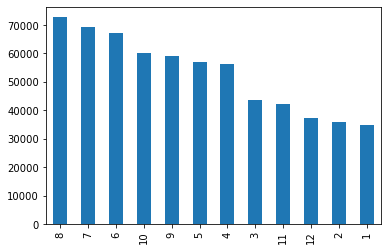

In [196]:
n_df.month.value_counts().plot(kind='bar')

<AxesSubplot:>

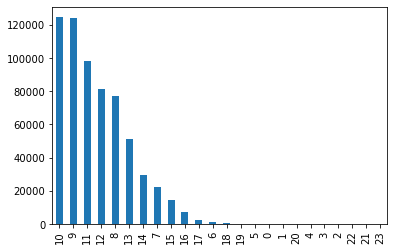

In [197]:
n_df.hour.value_counts().plot(kind='bar')

<AxesSubplot:>

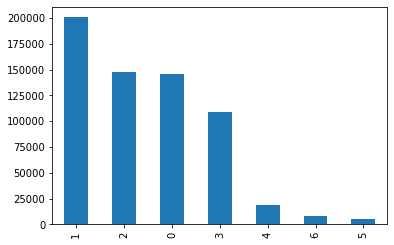

In [200]:
n_df.dayofweek.value_counts().plot(kind='bar')

In [221]:
p_df=n_df[['new_date','HUC12_','Latitude','Longitude','SampleId','Parameter','MeasureValue']]

In [222]:
p_df.head()

,new_date,HUC12_,Latitude,Longitude,SampleId,Parameter,MeasureValue
5528,2019-03-24 12:28:00,020801090405,38.6336,-75.6177,1.0,DO,10.6
5529,2019-03-24 12:46:00,020801090404,38.6422,-75.6068,1.0,DO,11.0
5530,2019-03-24 13:05:00,020801090405,38.6013,-75.6563,1.0,DO,11.0
5531,2019-03-24 13:05:00,020801090405,38.6013,-75.6563,1.0,DO,10.9
5532,2019-03-24 13:05:00,020801090405,38.6013,-75.6563,1.0,DO,10.9


In [206]:
n_df.columns

Index(['new_date', 'CloudCover', 'GaugeHeight', 'GroupCode', 'HUC12',
       'Latitude', 'Longitude', 'MeasureValue', 'Unit', 'Method',
       'Other Conditions', 'Parameter', 'Rainfall', 'Rainfall Within 24 Hours',
       'Rainfall Within 48 Hours', 'SampleDepth', 'SampleId', 'Station',
       'StationCode', 'StationName', 'Weather Conditions Day Before Yesterday',
       'Weather Conditions Today', 'Weather Conditions Yesterday',
       'WindDirection', 'WindSpeed', 'state', 'HUC12_', 'HUCNAME_', 'FIPS_',
       'COUNTY_', 'STATE_', 'areaacres', 'states', 'huc12', 'za_mean', 'lc_0',
       'lc_11', 'lc_21', 'lc_22', 'lc_23', 'lc_24', 'lc_31', 'lc_41', 'lc_42',
       'lc_43', 'lc_52', 'lc_71', 'lc_81', 'lc_82', 'lc_90', 'lc_95', 'month',
       'year', 'week', 'dayofweek', 'hour', 'min', 'quarter'],
      dtype='object')

In [223]:
p_df=p_df.groupby(['new_date','HUC12_','Latitude','Longitude','Parameter'])['MeasureValue'].aggregate('mean').unstack().reset_index()

In [225]:
p_df.columns.name = None

In [226]:
p_df.head()

,new_date,HUC12_,Latitude,Longitude,DO,TN,TP
0,1998-01-10 12:00:00,020503050408,40.251142,-76.958114,9.8,NaN,NaN
1,1998-01-10 12:00:00,020503050408,40.262529,-76.978808,8.0,NaN,NaN
2,1998-01-11 12:00:00,020503050308,40.215365,-77.303970,9.9,NaN,NaN
3,1998-01-11 12:00:00,020503050308,40.226963,-77.332296,10.4,NaN,NaN
4,1998-01-11 12:00:00,020503050401,40.211399,-77.299815,9.7,NaN,NaN


In [264]:
f_df=n_df[['new_date', 'CloudCover', 'GaugeHeight', 'GroupCode', 'HUC12',
       'Latitude', 'Longitude','Method',
       'Other Conditions', 'Rainfall', 'Rainfall Within 24 Hours',
       'Rainfall Within 48 Hours', 'SampleDepth', 'SampleId', 'Station',
       'StationCode', 'StationName', 'Weather Conditions Day Before Yesterday',
       'Weather Conditions Today', 'Weather Conditions Yesterday',
       'WindDirection', 'WindSpeed', 'state', 'HUC12_', 'HUCNAME_', 'FIPS_',
       'COUNTY_', 'STATE_', 'areaacres', 'states', 'huc12', 'za_mean', 'lc_0',
       'lc_11', 'lc_21', 'lc_22', 'lc_23', 'lc_24', 'lc_31', 'lc_41', 'lc_42',
       'lc_43', 'lc_52', 'lc_71', 'lc_81', 'lc_82', 'lc_90', 'lc_95', 'month',
       'year', 'week', 'dayofweek', 'hour', 'min', 'quarter']].drop_duplicates(subset=['new_date','HUC12_','Latitude','Longitude']).merge(p_df, on=['new_date','HUC12_','Latitude','Longitude'])

In [265]:
f_df.shape

(103295, 58)

In [230]:
n_df[['new_date', 'CloudCover', 'GaugeHeight', 'GroupCode', 'HUC12',
       'Latitude', 'Longitude','Method',
       'Other Conditions', 'Rainfall', 'Rainfall Within 24 Hours',
       'Rainfall Within 48 Hours', 'SampleDepth', 'SampleId', 'Station',
       'StationCode', 'StationName', 'Weather Conditions Day Before Yesterday',
       'Weather Conditions Today', 'Weather Conditions Yesterday',
       'WindDirection', 'WindSpeed', 'state', 'HUC12_', 'HUCNAME_', 'FIPS_',
       'COUNTY_', 'STATE_', 'areaacres', 'states', 'huc12', 'za_mean', 'lc_0',
       'lc_11', 'lc_21', 'lc_22', 'lc_23', 'lc_24', 'lc_31', 'lc_41', 'lc_42',
       'lc_43', 'lc_52', 'lc_71', 'lc_81', 'lc_82', 'lc_90', 'lc_95', 'month',
       'year', 'week', 'dayofweek', 'hour', 'min', 'quarter']].shape

(635907, 55)

In [266]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103295 entries, 0 to 103294
Data columns (total 58 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   new_date                                 103295 non-null  datetime64[ns]
 1   CloudCover                               67874 non-null   object        
 2   GaugeHeight                              10665 non-null   float64       
 3   GroupCode                                18242 non-null   object        
 4   HUC12                                    85053 non-null   float64       
 5   Latitude                                 103295 non-null  float64       
 6   Longitude                                103295 non-null  float64       
 7   Method                                   85053 non-null   object        
 8   Other Conditions                         496 non-null     object        
 9   Rainfall                  

In [267]:
f_df.head()

,new_date,CloudCover,GaugeHeight,GroupCode,HUC12,Latitude,Longitude,Method,Other Conditions,Rainfall,...,month,year,week,dayofweek,hour,min,quarter,DO,TN,TP
0,2019-03-24 12:28:00,NaN,NaN,NWA,NaN,38.6336,-75.6177,NaN,NaN,NaN,...,3,2019,12,6,12,28,1,10.60,4.24,0.05
1,2019-03-24 12:46:00,NaN,NaN,NWA,NaN,38.6422,-75.6068,NaN,NaN,NaN,...,3,2019,12,6,12,46,1,11.00,6.13,0.05
2,2019-03-24 13:05:00,NaN,NaN,NWA,NaN,38.6013,-75.6563,NaN,NaN,NaN,...,3,2019,12,6,13,5,1,10.86,4.41,0.05
3,2019-03-24 15:20:00,NaN,NaN,NWA,NaN,38.5645,-75.6723,NaN,NaN,NaN,...,3,2019,12,6,15,20,1,11.50,6.21,0.05
4,2019-03-24 15:34:00,NaN,NaN,NWA,NaN,38.5583,-75.5696,NaN,NaN,NaN,...,3,2019,12,6,15,34,1,11.55,5.27,0.05


In [325]:
# del f_df

In [324]:
# f_df.to_csv(os.path.join(PROJ_ROOT, 
#                          'data',
#                         'processed',
#                          'lc_pol_merged_data.csv'), index=False)

In [270]:
import netCDF4



In [273]:
rm = os.path.join(PROJ_ROOT, 
                         'data',
                        'raw-data',
                         'acpcp.2011.nc')

nc=netCDF4.Dataset(rm)

In [317]:
nc.variables.keys()

dict_keys(['time', 'lat', 'lon', 'y', 'x', 'Lambert_Conformal', 'acpcp'])

In [327]:
nc.variables['acpcp'][:].data.shape

MemoryError: Unable to allocate 1.05 GiB for an array with shape (2920, 277, 349) and data type float32

In [296]:
def extract_relevant_data(data, lat_range, lon_range):
    xy_inds = np.where(latdata)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.2
    centerlat: 50.0
    centerlon: -107.0
    institution: National Centers for Environmental Prediction
    latcorners: [ 1.000001  0.897945 46.3544   46.63433 ]
    loncorners: [-145.5       -68.32005    -2.569891  148.6418  ]
    platform: Model
    standardpar1: 50.0
    standardpar2: 50.000001
    title: 8x Daily NARR
    comments: recreated Wed Nov 25 05:34:44 MST 2015 by NOAA/ESRL/PSD as NCEP has rerun the model from 04/01/2009 - 01/31/2015 to fix codes and Mexican precipitation data preparation. Info at http://rda.ucar.edu/datasets/ds608.0/docs/rr4.pdf
    history: created Wed Nov 25 05:34:44 MST 2015 by NOAA/ESRL/PSD
    dataset_title: NCEP North American Regional Reanalysis (NARR)
    references: https://www.esrl.noaa.gov/psd/data/gridded/data.narr.html
    source: http://www.emc.ncep.noaa.gov/mmb/rreanl/index.html
    References: 
    dimensions(sizes): time(